### Import packages 


In [2]:
import pandas as pd 
import os
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import kruskal
from tabulate import tabulate
colorpalette = sns.hls_palette(8,h=.9)

### Variables 

In [3]:
PROJ = 'M1 Task 1'
doc = 'impurities_24-1.csv'
categories = ['Day', 'Filtration', 'Surfactant', 'Sonication'] #Independent
response = 'response' #Dependent

### Dirs

In [4]:
cwd = os.getcwd()
print("Current cwd:", cwd)
cwd = cwd.replace("\\", "/")
projdir = cwd + '/Projects/' + PROJ + '/'
resultsdir = projdir + 'ANOVA/'

Current cwd: /Users/kristianh/Documents/Skole/Chemometrics/M1


### Work folders 

In [5]:
folds = [projdir,resultsdir]
for fold in folds:
    if not os.path.exists(fold):
        os.makedirs(fold)

### Data

In [6]:
fil = projdir + doc 
df = pd.read_csv(fil, sep="\t")
print(df)

    day  filtration  surfactant  sonication  response
0     1          25          20          10       261
1     1          25          10           0       273
2     1          25          20           0       243
3     1          25          30           0       249
4     1          25          30          10       246
5     1          25          10          10       244
6     1          50          30           0       255
7     1          50          20          10       226
8     1          50          10          10       239
9     1          50          30          10       254
10    1          50          10           0       288
11    1          50          20           0       296
12    1          75          30          10       221
13    1          75          20          10       279
14    1          75          10           0       280
15    1          75          20           0       293
16    1          75          30           0       229
17    1          75         

### ANOVA

/Users/kristianh/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


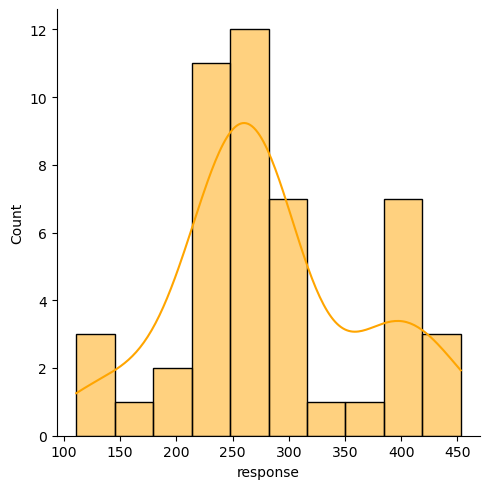

In [7]:
Bins = 10 
sns.displot(df['response'],color='orange',bins=Bins,kde=True)

#plt.hist(df['response'], bins=10, edgecolor='black')

# Show the plot
plt.show()

Text(0.5, 1.0, 'QQ Plot')

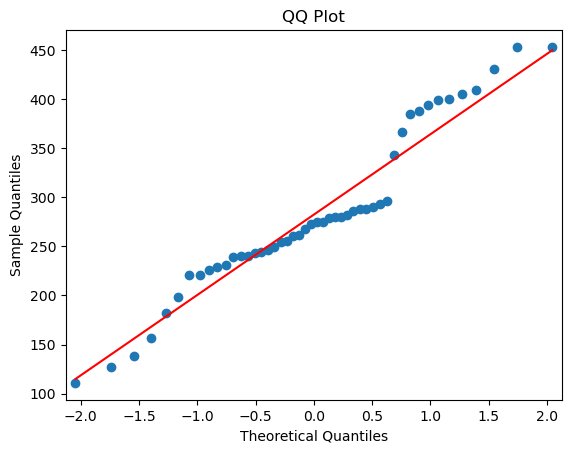

In [8]:
sm.qqplot(df['response'],line='s')
plt.title('QQ Plot')


In [9]:
mystring = 'response ~ (day + filtration + surfactant + sonication) ** 4'

model = ols(mystring, data = df).fit()
anova_table = sm.stats.anova_lm(model, typ =2)
print(anova_table)

                                             sum_sq    df           F  \
day                                    20049.187500   1.0   22.082680   
filtration                            153773.437500   1.0  169.369939   
surfactant                               136.125000   1.0    0.149932   
sonication                              2282.520833   1.0    2.514026   
day:filtration                        111931.204167   1.0  123.283849   
day:surfactant                           450.000000   1.0    0.495641   
day:sonication                            58.520833   1.0    0.064456   
filtration:surfactant                     78.400000   1.0    0.086352   
filtration:sonication                    270.937500   1.0    0.298417   
surfactant:sonication                     18.000000   1.0    0.019826   
day:filtration:surfactant                366.025000   1.0    0.403149   
day:filtration:sonication                  4.004167   1.0    0.004410   
day:surfactant:sonication               1378.125000

### Post-hoc


Text(0.5, 1.0, 'Barchart of Day')

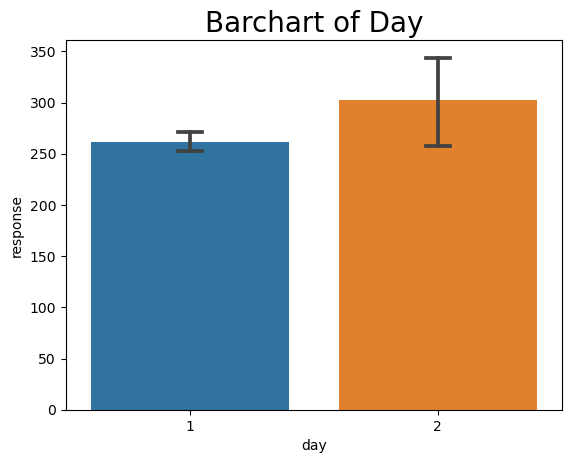

In [10]:
dx = 'day'; dy = 'response'; ort = "h"; pal = "Set2"; sigma = .2
sns.barplot(x = dx, y = dy, data = df, capsize = .1)
tit = "Barchart of " + 'Day'
plt.title(tit,fontsize = 20)

Text(0.5, 1.0, 'Barchart of Filtration')

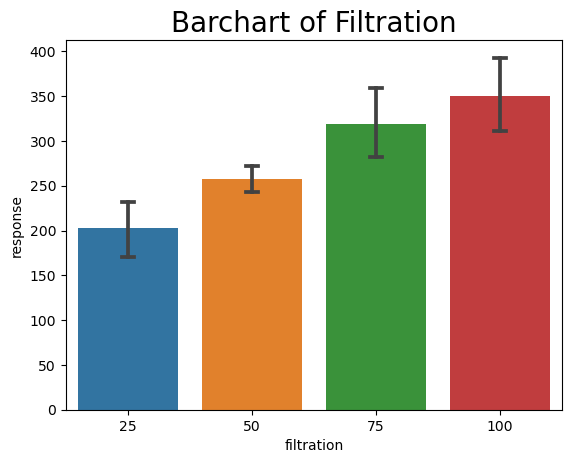

In [11]:
dx = 'filtration'; dy = 'response'; ort = "h"; pal = "Set2"; sigma = .2
sns.barplot(x = dx, y = dy, data = df, capsize = .1)
tit = "Barchart of " + 'Filtration'
plt.title(tit,fontsize = 20)

### Non- normal distribution

In [13]:
# Create groups based on combinations of independent variables
# Assuming 'Day', 'Filtration', 'Surfactant' are the independent variables and 'Response' is the dependent variable
groups = df.groupby(['day', 'filtration', 'surfactant'])['response'].apply(list)

# Convert these groups into a list of lists for the Kruskal-Wallis test
totest = list(groups)

# Perform Kruskal-Wallis test
H_statistic, p_val = kruskal(*totest)

print("H-statistic:", H_statistic)
print("p-value:", p_val)

H-statistic: 39.91223259854488
p-value: 0.015720831680581807


In [14]:
# For 'Day'
groups_day = [group['response'].values for name, group in df.groupby('day')]
H_day, p_val_day = kruskal(*groups_day)
print("Kruskal-Wallis for Day: H-statistic =", H_day, ", p-value =", p_val_day)

# For 'Filtration'
groups_filtration = [group['response'].values for name, group in df.groupby('filtration')]
H_filtration, p_val_filtration = kruskal(*groups_filtration)
print("Kruskal-Wallis for Filtration: H-statistic =", H_filtration, ", p-value =", p_val_filtration)

# For 'Surfactant'
groups_surfactant = [group['response'].values for name, group in df.groupby('surfactant')]
H_surfactant, p_val_surfactant = kruskal(*groups_surfactant)
print("Kruskal-Wallis for Surfactant: H-statistic =", H_surfactant, ", p-value =", p_val_surfactant)

# For 'Sonication'
groups_sonication = [group['response'].values for name, group in df.groupby('sonication')]
H_sonication, p_val_sonication = kruskal(*groups_sonication)
print("Kruskal-Wallis for Sonication: H-statistic =", H_sonication, ", p-value =", p_val_sonication)

Kruskal-Wallis for Day: H-statistic = 1.5567357114417033 , p-value = 0.21214381565501855
Kruskal-Wallis for Filtration: H-statistic = 22.59175353820538 , p-value = 4.912047603193774e-05
Kruskal-Wallis for Surfactant: H-statistic = 0.22599834401128632 , p-value = 0.8931513996400281
Kruskal-Wallis for Sonication: H-statistic = 1.4555122706048356 , p-value = 0.2276455174137454


### Boxplot Day

<Axes: xlabel='day', ylabel='response'>

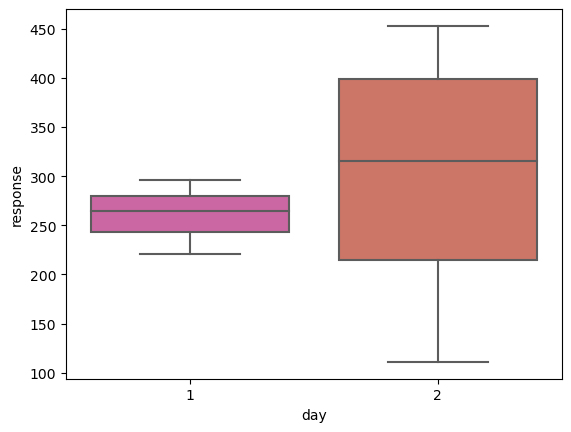

In [15]:
sns.boxplot(data=df, x='day', y='response', palette=colorpalette)

### Boxplot Filtration

<Axes: xlabel='filtration', ylabel='response'>

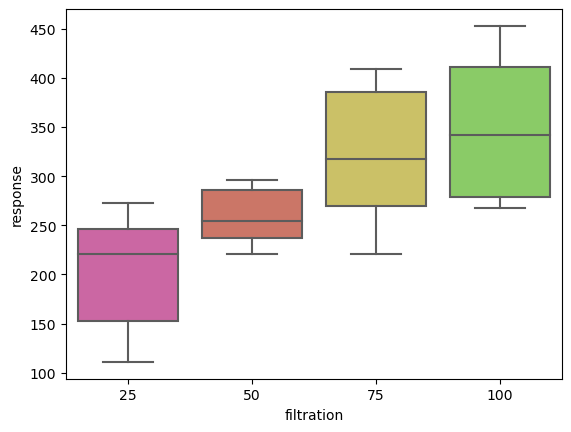

In [16]:
sns.boxplot(data=df, x='filtration', y='response', palette=colorpalette)

### Boxplot Surfactant 

<Axes: xlabel='surfactant', ylabel='response'>

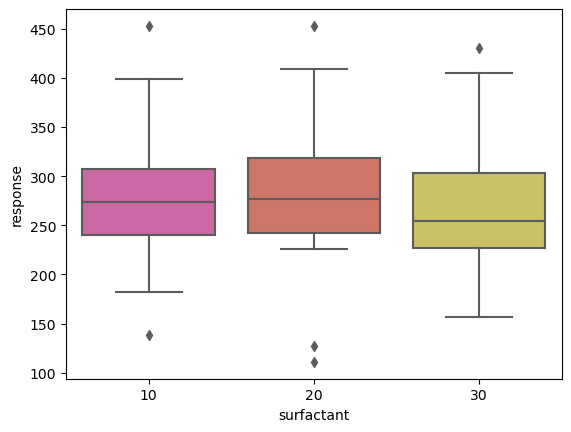

In [17]:
sns.boxplot(data=df, x='surfactant', y='response', palette=colorpalette)

### Boxplot Sonication

<Axes: xlabel='sonication', ylabel='response'>

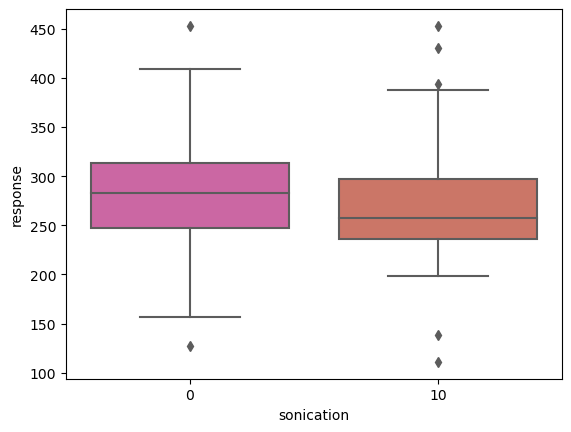

In [18]:
sns.boxplot(data=df, x='sonication', y='response', palette=colorpalette)

## Linear regression


Slope: 2.025
Intercept: 155.79166666666669
R-squared: 0.4785575051892561
P-value: 5.183316808876141e-08


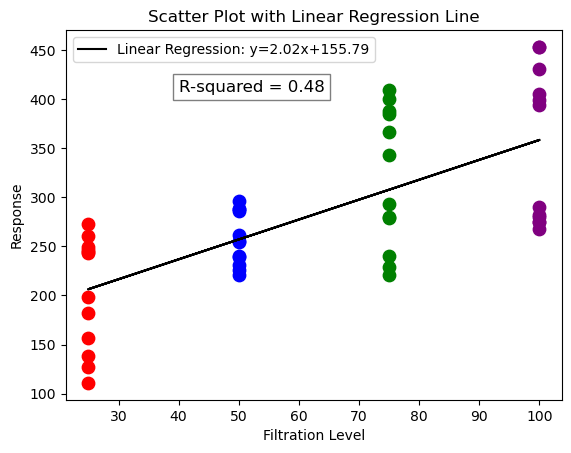

In [19]:

filtration = df['filtration']
response = df['response']
colordic = {25: 'red', 50: 'blue', 75:'green', 100:'purple'}

for e in range(len(filtration)):
    plt.scatter(filtration[e], response[e], s=80, color=colordic[filtration[e]])
slope, intercept, r_value, p_value, std_err = stats.linregress(filtration, response)

regression_line = [slope * x + intercept for x in filtration]

# Plot the regression line
plt.plot(filtration, regression_line, color='black', label=f'Linear Regression: y={slope:.2f}x+{intercept:.2f}')

# Add labels, title, and legend
plt.xlabel('Filtration Level')
plt.ylabel('Response')
plt.title('Scatter Plot with Linear Regression Line')
plt.legend()

# Show the plot

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
r_squared = r_value**2
plt.text(
    x=max(filtration) * 0.4,  # X position for the text
    y=max(response) * 0.9,    # Y position for the text
    s=f'R-squared = {r_squared:.2f}',  # Text to display
    fontsize=12,               # Font size
    bbox=dict(facecolor='white', alpha=0.5)  # Background color for better readability
)
plt.show()

### CI

In [20]:
res = stats.linregress(filtration, response)
tinv = lambda p, df: abs(stats.t.ppf(p/2, df))
ts = tinv(0.05, len(filtration-2))
Ilower = round(res.intercept - ts*res.intercept_stderr,2)
Iupper = round(res.intercept + ts*res.intercept_stderr,2)
Slower = round(res.slope - ts*res.stderr, 2)
Supper = round(res.slope + ts*res.stderr,2)
print('Slope and intercept Confidence intervals at 95%')
table = tabulate([['Intercept', Ilower,Iupper],['Slope',Slower,Supper]], headers=['Variable','Lower CI', 'Upper CI'])
print(table)

Slope and intercept Confidence intervals at 95%
Variable      Lower CI    Upper CI
----------  ----------  ----------
Intercept       112.89      198.69
Slope             1.4         2.65


### Without Day 2 

Slope: 0.2973333333333333
Intercept: 243.33333333333337
R-squared: 0.1415349148297306
P-value: 0.07000281102281737


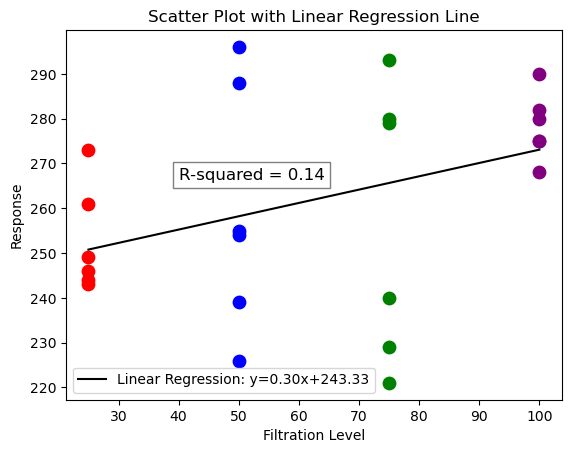

In [21]:
#Filter day 1 and day 2 
day1 = df[df['day'] == 1]
day2 = df[df['day'] == 2]

filtrationDay1 = day1['filtration']
responseDay1 = day1['response']
colordic = {25: 'red', 50: 'blue', 75:'green', 100:'purple'}

for e in range(len(filtrationDay1)):
    plt.scatter(filtrationDay1[e], responseDay1[e], s=80, color=colordic[filtrationDay1[e]])
slope, intercept, r_value, p_value, std_err = stats.linregress(filtrationDay1, responseDay1)

regression_line = [slope * x + intercept for x in filtrationDay1]

# Plot the regression line
plt.plot(filtrationDay1, regression_line, color='black', label=f'Linear Regression: y={slope:.2f}x+{intercept:.2f}')

# Add labels, title, and legend
plt.xlabel('Filtration Level')
plt.ylabel('Response')
plt.title('Scatter Plot with Linear Regression Line')
plt.legend()

# Show the plot

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
r_squared = r_value**2
plt.text(
    x=max(filtrationDay1) * 0.4,  # X position for the text
    y=max(responseDay1) * 0.9,    # Y position for the text
    s=f'R-squared = {r_squared:.2f}',  # Text to display
    fontsize=12,               # Font size
    bbox=dict(facecolor='white', alpha=0.5)  # Background color for better readability
)
plt.show()